In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [2]:
data=pd.read_csv('Insurance_train.csv')

In [3]:
data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
data.tail()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58591,ID58592,0.124429,0.02,0.442308,C8,8794,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0


In [5]:
data.shape

(58592, 44)

In [6]:
df=data.copy()

# DATA CLEANING

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [9]:
df.dtypes

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

In [10]:
#Encoding 


df["age_of_car"]=round(df['age_of_car']*100)
df["age_of_policyholder"]=round(df['age_of_policyholder']*100)
df["policy_tenure"]=round(df['policy_tenure']*100)

In [11]:
df['age_of_car'] = df['age_of_car'].astype(int)
df['age_of_policyholder'] = df['age_of_policyholder'].astype(int)
df['policy_tenure'] = df['policy_tenure'].astype(int)

In [12]:
df.tail()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
58587,ID58588,36,13,64,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,120,2,52,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,116,5,45,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,124,14,56,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58591,ID58592,12,2,44,C8,8794,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0


In [13]:
pd.set_option('display.max_rows',None)
df['policy_tenure'].value_counts()


9      2137
8      1522
10     1260
1       853
101     826
102     825
103     820
4       815
107     799
105     791
108     781
104     778
7       771
106     750
109     744
110     739
112     723
111     701
118     699
3       685
113     684
115     681
114     680
119     674
117     673
124     654
5       648
116     641
121     635
123     631
122     628
120     578
6       556
25      554
29      530
14      513
24      512
100     506
52      493
12      492
2       489
13      489
30      487
54      482
28      470
26      468
55      461
27      448
56      445
21      444
53      444
11      442
57      439
51      437
17      436
19      434
22      430
59      429
50      427
23      422
15      409
31      409
18      405
20      405
16      400
58      397
60      397
34      396
32      381
61      380
49      372
41      371
37      369
35      358
33      350
36      340
39      340
48      339
40      329
62      327
47      322
46      321
43      317
125 

In [14]:
df['policy_tenure'].value_counts()

9      2137
8      1522
10     1260
1       853
101     826
102     825
103     820
4       815
107     799
105     791
108     781
104     778
7       771
106     750
109     744
110     739
112     723
111     701
118     699
3       685
113     684
115     681
114     680
119     674
117     673
124     654
5       648
116     641
121     635
123     631
122     628
120     578
6       556
25      554
29      530
14      513
24      512
100     506
52      493
12      492
2       489
13      489
30      487
54      482
28      470
26      468
55      461
27      448
56      445
21      444
53      444
11      442
57      439
51      437
17      436
19      434
22      430
59      429
50      427
23      422
15      409
31      409
18      405
20      405
16      400
58      397
60      397
34      396
32      381
61      380
49      372
41      371
37      369
35      358
33      350
36      340
39      340
48      339
40      329
62      327
47      322
46      321
43      317
125 

In [15]:
df.loc[df['policy_tenure'] >= 57, 'policy_tenure'] = 57

In [16]:
df['policy_tenure'].value_counts()

57    29670
9      2137
8      1522
10     1260
1       853
4       815
7       771
3       685
5       648
6       556
25      554
29      530
14      513
24      512
52      493
12      492
13      489
2       489
30      487
54      482
28      470
26      468
55      461
27      448
56      445
53      444
21      444
11      442
51      437
17      436
19      434
22      430
50      427
23      422
15      409
31      409
18      405
20      405
16      400
34      396
32      381
49      372
41      371
37      369
35      358
33      350
36      340
39      340
48      339
40      329
47      322
46      321
43      317
38      315
44      306
45      299
42      297
0       276
Name: policy_tenure, dtype: int64

In [17]:
df['policy_tenure'].median()

57.0

In [18]:
df.loc[df['policy_tenure'] == 0.0, 'policy_tenure'] = 57

In [19]:
pd.set_option('display.max_rows',None)
df['age_of_car'].value_counts()

1      6362
0      5257
2      5189
3      4415
4      3763
5      3342
10     3123
6      3053
7      2888
8      2730
9      2643
12     2506
11     2442
13     2315
14     2151
15     1964
16     1291
17      931
18      738
19      458
20      287
21      172
22      148
23       90
24       65
25       46
30       32
27       29
31       26
28       25
26       24
29       21
32       13
33       12
36        8
34        6
39        5
38        4
100       3
37        3
49        2
46        2
44        2
42        1
45        1
35        1
82        1
62        1
81        1
Name: age_of_car, dtype: int64

In [20]:
df['age_of_car'].median()

6.0

In [21]:
df.loc[df['age_of_car'] >= 6, 'age_of_car'] = 6

In [22]:
df.loc[df['age_of_car'] == 0.0, 'age_of_car'] = 6

In [23]:
df['age_of_car'].value_counts()

6    35521
1     6362
2     5189
3     4415
4     3763
5     3342
Name: age_of_car, dtype: int64

In [24]:
df['age_of_policyholder'].value_counts()

38     3401
37     1766
35     1733
36     1724
39     1715
47     1713
40     1710
43     1696
44     1691
33     1691
46     1670
34     1652
48     1651
41     1650
45     1614
42     1613
32     1599
31     1584
50     1566
49     1563
30     1541
51     1521
52     1419
29     1408
62     1378
53     1360
54     1298
55     1202
56     1118
57     1046
58      927
59      891
60      829
61      735
64      619
63      593
65      560
67      488
66      488
68      463
70      447
69      416
71      372
72      345
73      334
75      287
74      286
76      233
77      199
78      172
79      131
80      119
81       83
82       61
83       54
84       43
85       26
88       23
86       21
89       14
87       13
91        5
95        4
93        3
92        3
94        3
90        3
96        2
97        1
99        1
98        1
100       1
Name: age_of_policyholder, dtype: int64

In [25]:
df['age_of_policyholder'].median()

45.0

In [26]:
df.loc[df['age_of_policyholder'] >= 80, 'age_of_policyholder'] = 45

In [27]:
df.nunique()

policy_id                           58592
policy_tenure                          57
age_of_car                              6
age_of_policyholder                    51
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                          

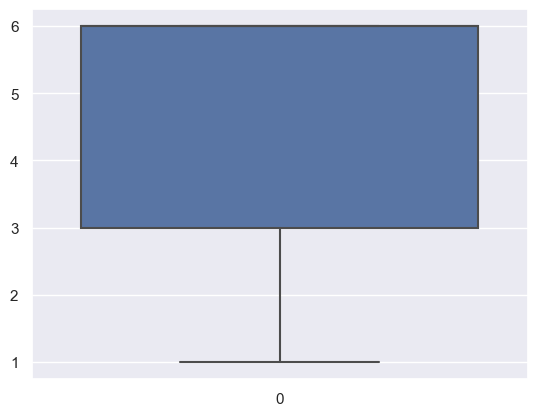

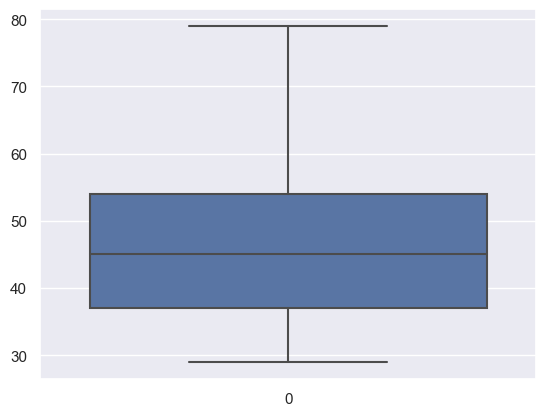

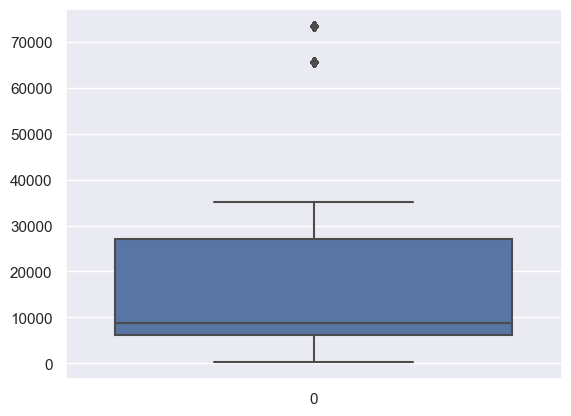

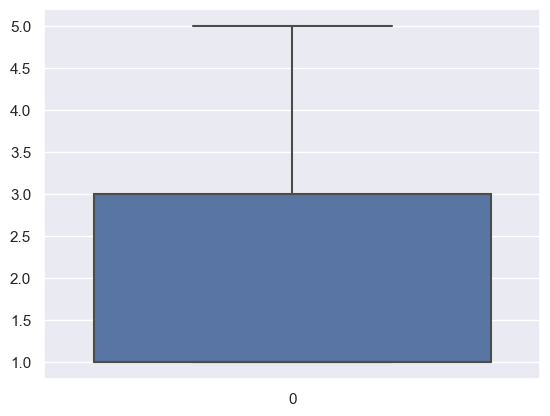

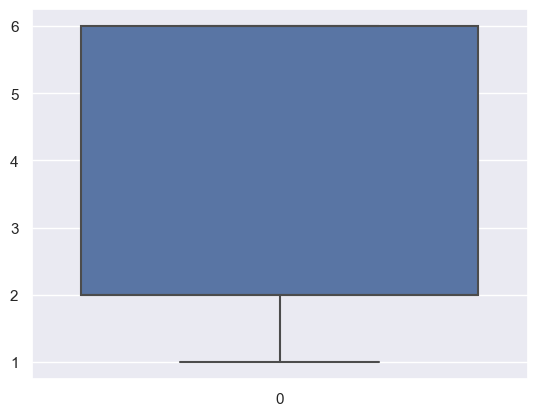

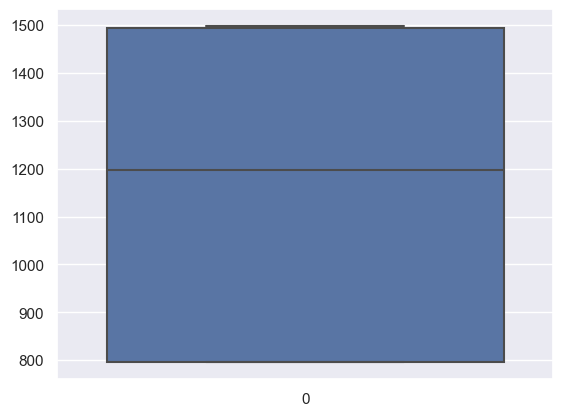

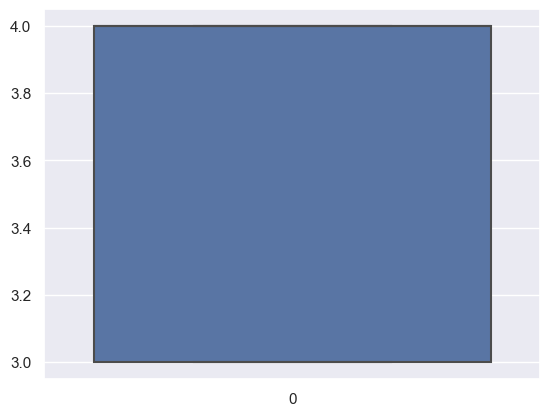

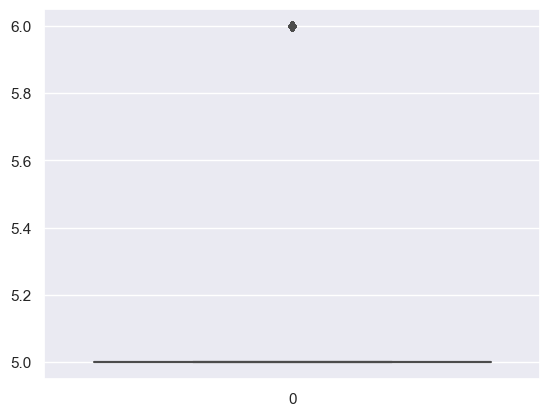

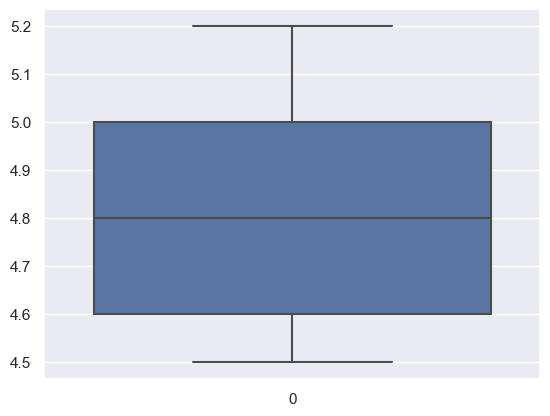

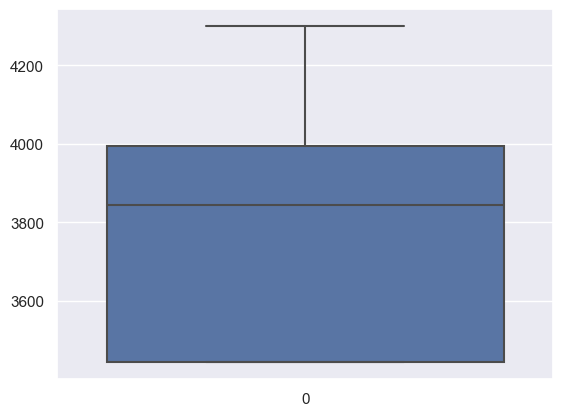

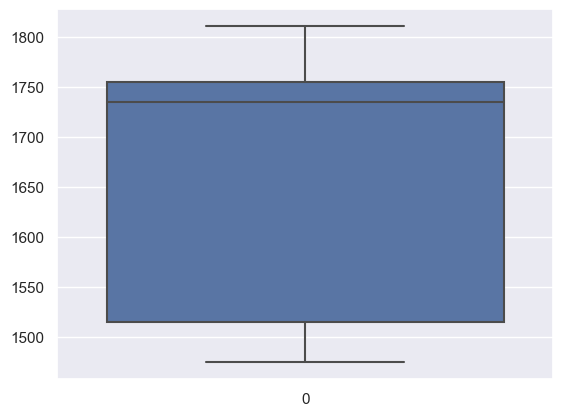

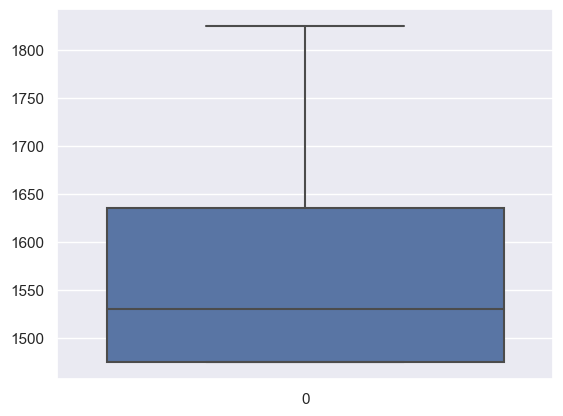

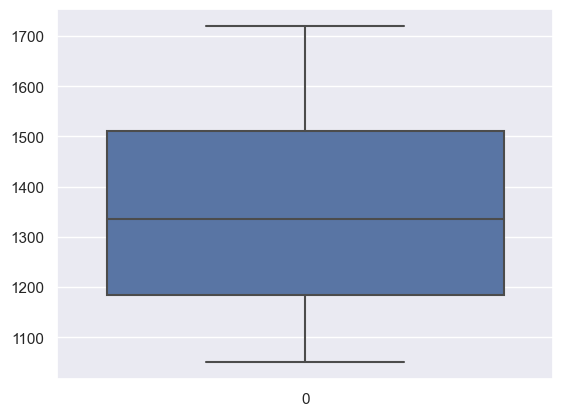

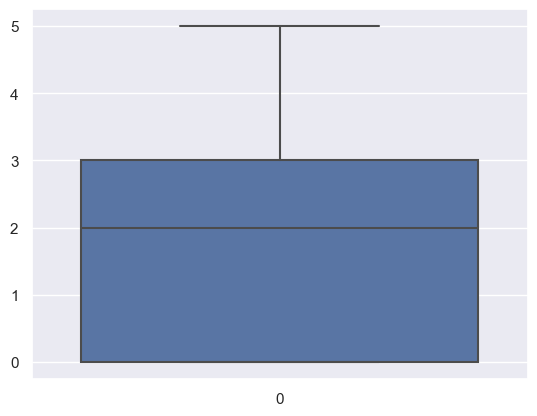

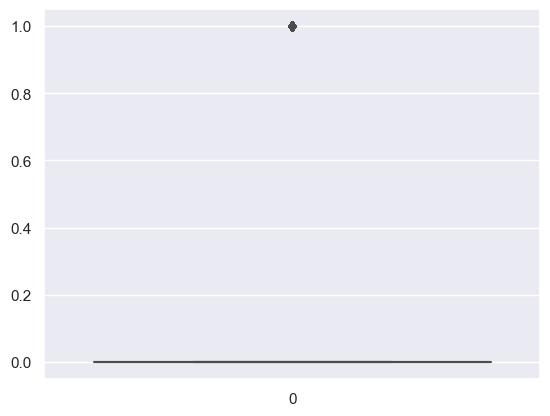

In [28]:
#outlier handling
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
for i in list(df.select_dtypes(exclude=['object']).columns)[1:]:
    boxplots(i)

<Axes: >

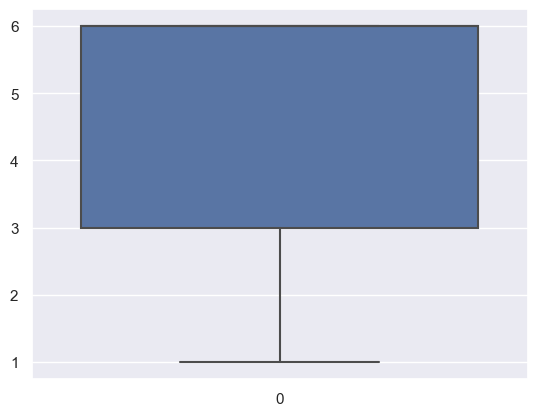

In [29]:
sns.boxplot(data=df['age_of_car'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  int32  
 2   age_of_car                        58592 non-null  int32  
 3   age_of_policyholder               58592 non-null  int32  
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [31]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,40.763432,4.691306,46.654594,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,20.302222,1.846888,11.769934,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,1.000000,1.000000,29.000000,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,22.000000,3.000000,37.000000,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,57.000000,6.000000,45.000000,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,57.000000,6.000000,54.000000,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,57.000000,6.000000,79.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


# EDA

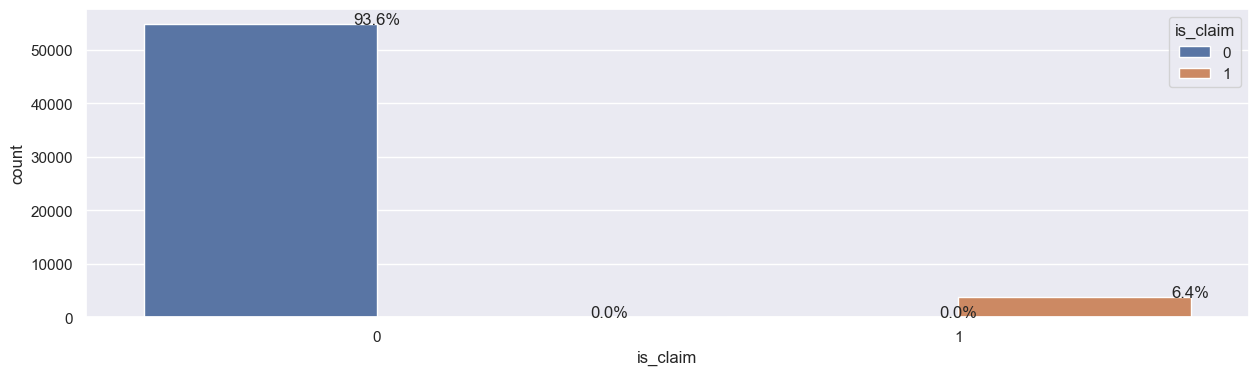

In [32]:
#Traget status count
plt.figure(figsize=(15,4))
ax = sns.countplot(x="is_claim", hue="is_claim", data=df)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

<Axes: xlabel='width', ylabel='height'>

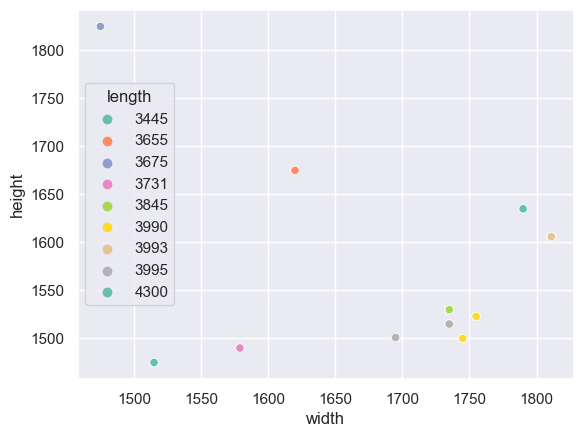

In [33]:
sns.scatterplot(data=df, x="width", y="height", hue="length", palette= "Set2")

<Axes: xlabel='model', ylabel='Count'>

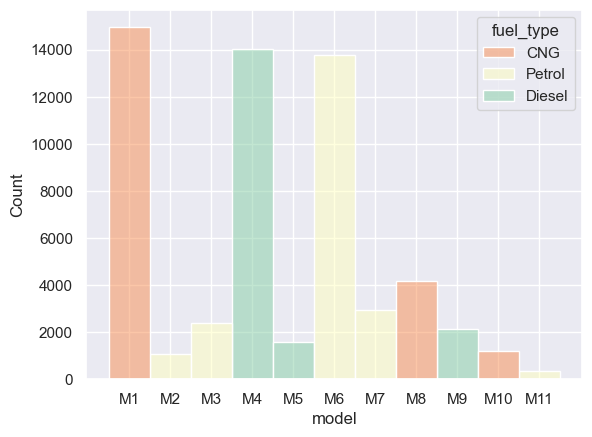

In [34]:
sns.histplot(data=df,x="model",hue="fuel_type", palette="Spectral")

<Axes: xlabel='model', ylabel='Count'>

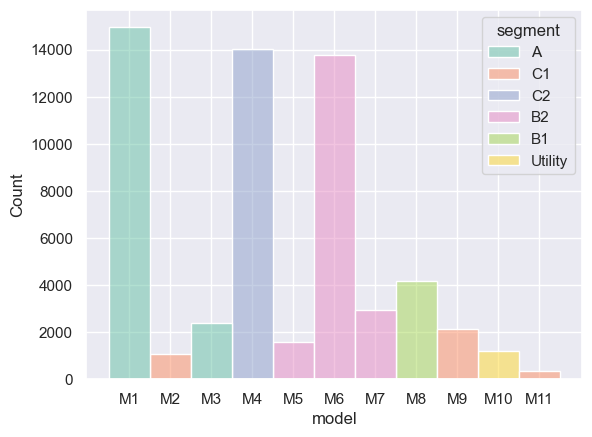

In [35]:
sns.histplot(data=df,x="model",hue="segment", palette="Set2")

<Axes: xlabel='model', ylabel='engine_type'>

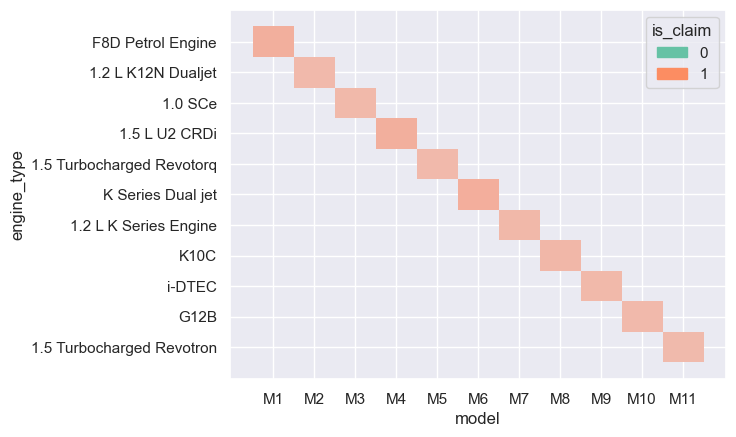

In [36]:
sns.histplot(data=df,x="model",y="engine_type",hue='is_claim',palette="Set2")

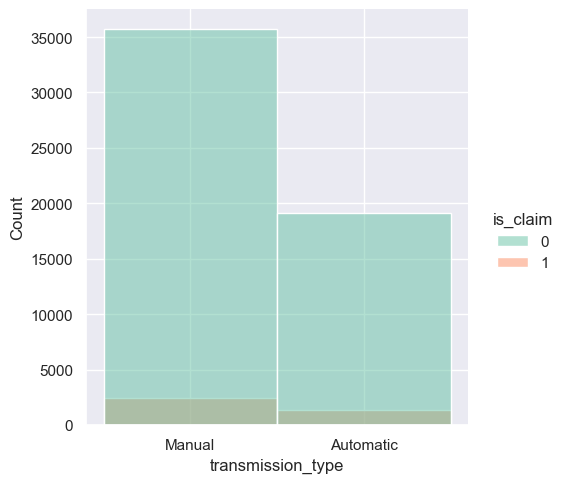

In [37]:
sns.displot(data=df,x="transmission_type", hue="is_claim",palette="Set2")

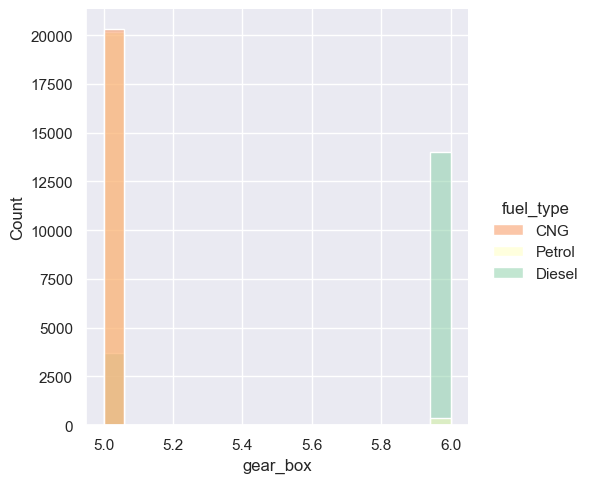

In [38]:
sns.displot(data=df,x="gear_box", hue="fuel_type",palette="Spectral")

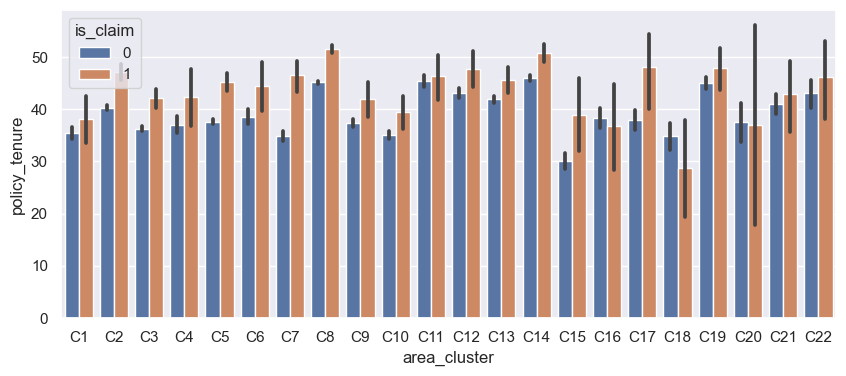

In [39]:
plt.figure(figsize=(10,4))
sns.barplot(data=df,x="area_cluster",y="policy_tenure",hue="is_claim")
plt.show()

<Axes: xlabel='policy_tenure', ylabel='fuel_type'>

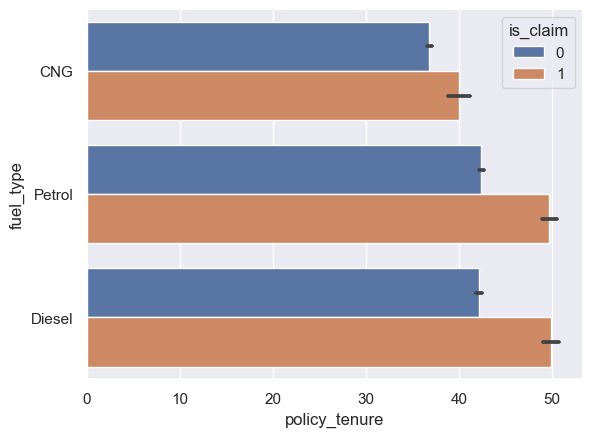

In [40]:
sns.barplot(data=df,x="policy_tenure", y="fuel_type",hue="is_claim")

<Axes: xlabel='gross_weight', ylabel='Count'>

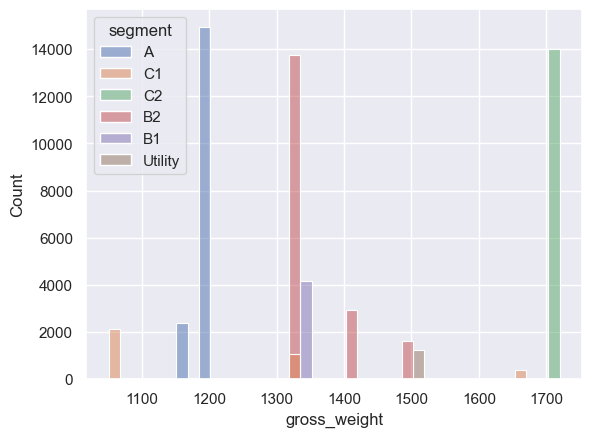

In [41]:
sns.histplot(data=df,x="gross_weight", hue="segment")

<Axes: xlabel='airbags', ylabel='fuel_type'>

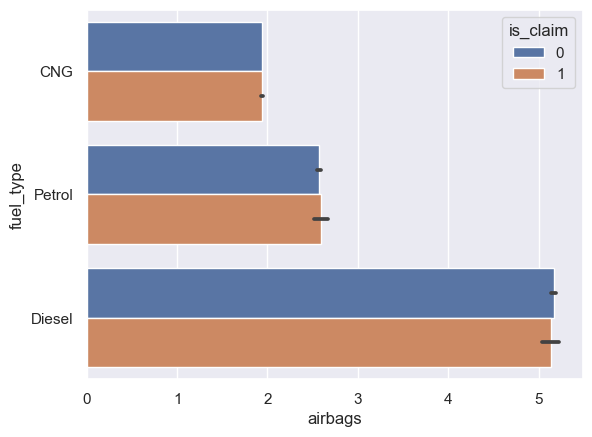

In [42]:
sns.barplot(data=df, x="airbags", y="fuel_type", hue="is_claim")

<Axes: xlabel='fuel_type', ylabel='ncap_rating'>

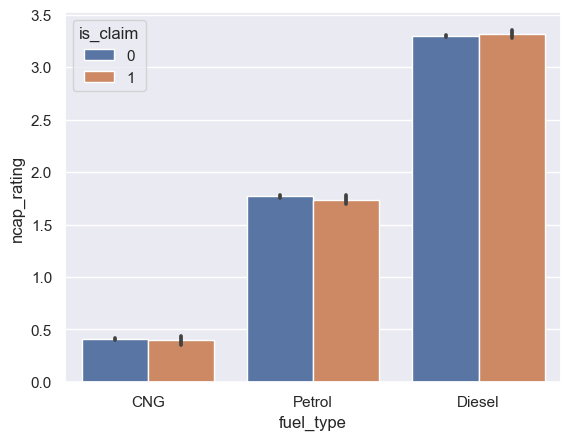

In [43]:
sns.barplot(data=df, x="fuel_type", y="ncap_rating", hue="is_claim")

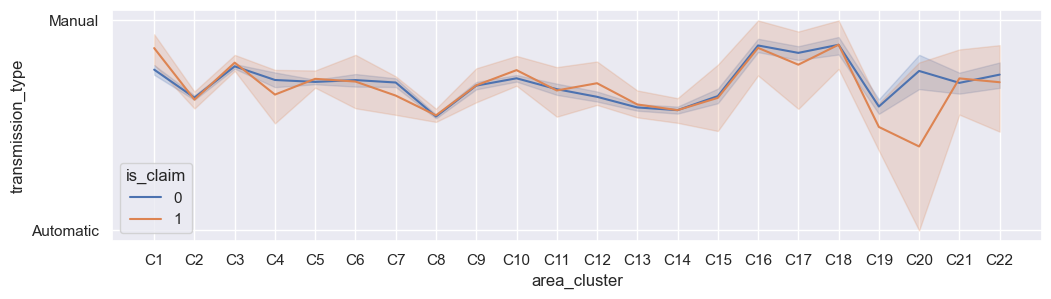

In [44]:
plt.figure(figsize=(12,3))
sns.lineplot(data=df,x="area_cluster",y="transmission_type",hue="is_claim")
plt.show()

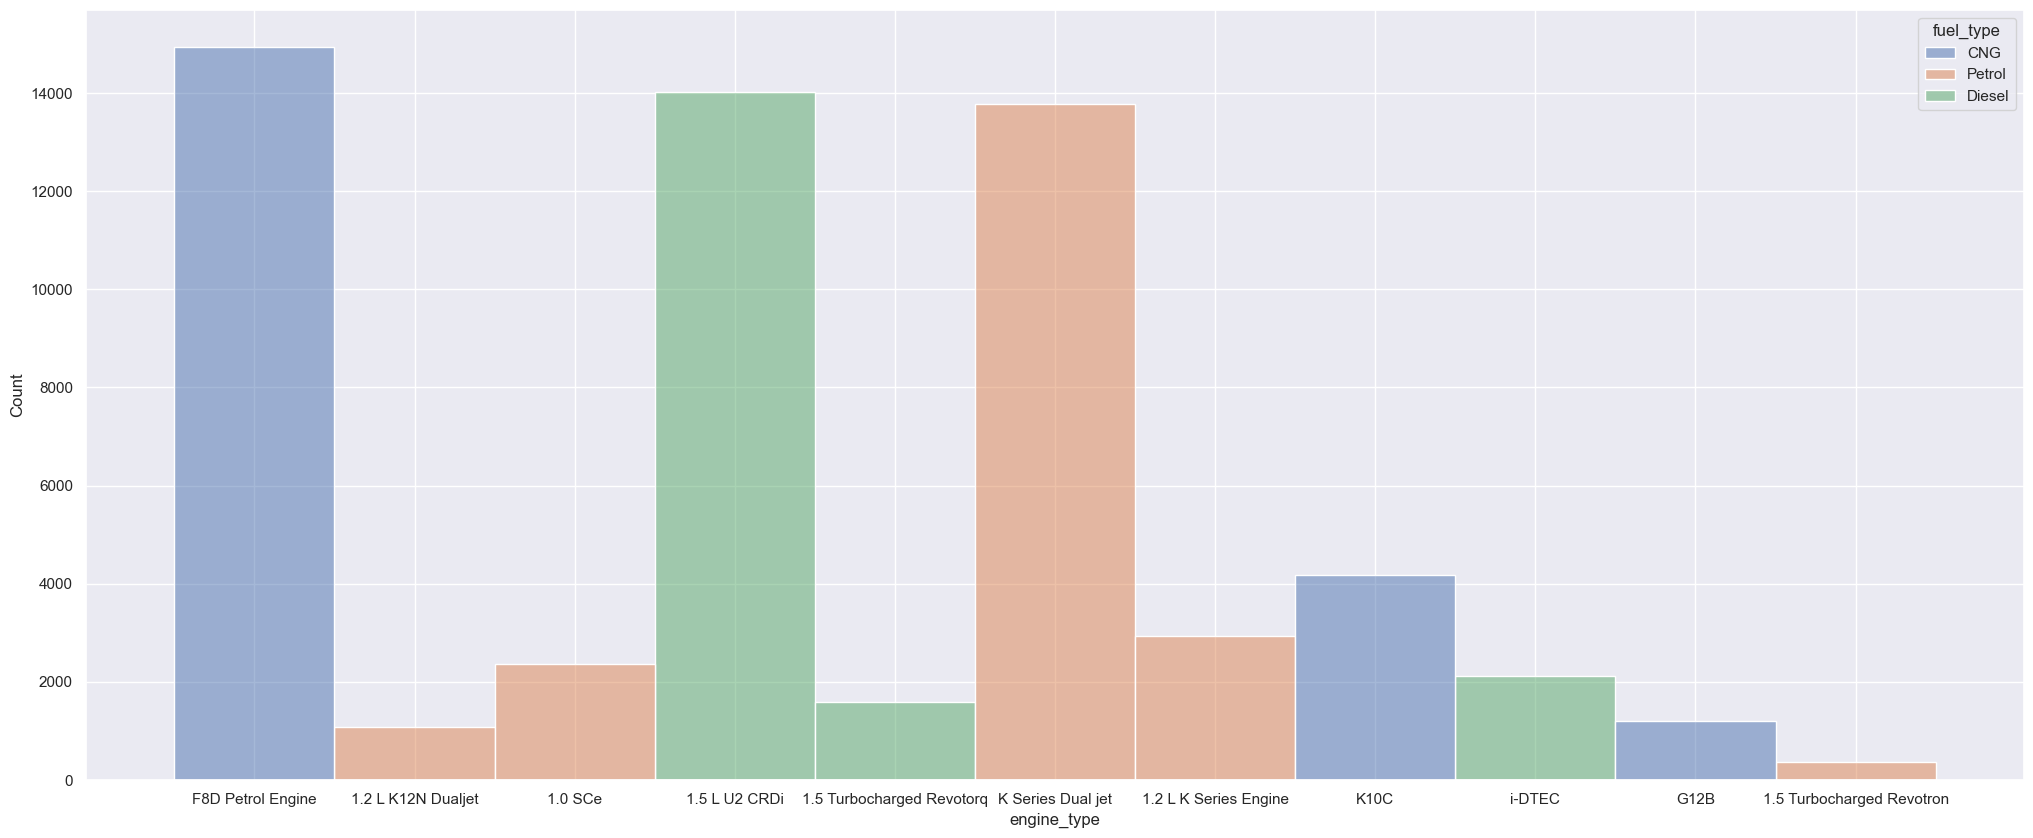

In [45]:
plt.figure(figsize=(25,10))
sns.histplot(data=df,x='engine_type',hue='fuel_type')
plt.show()

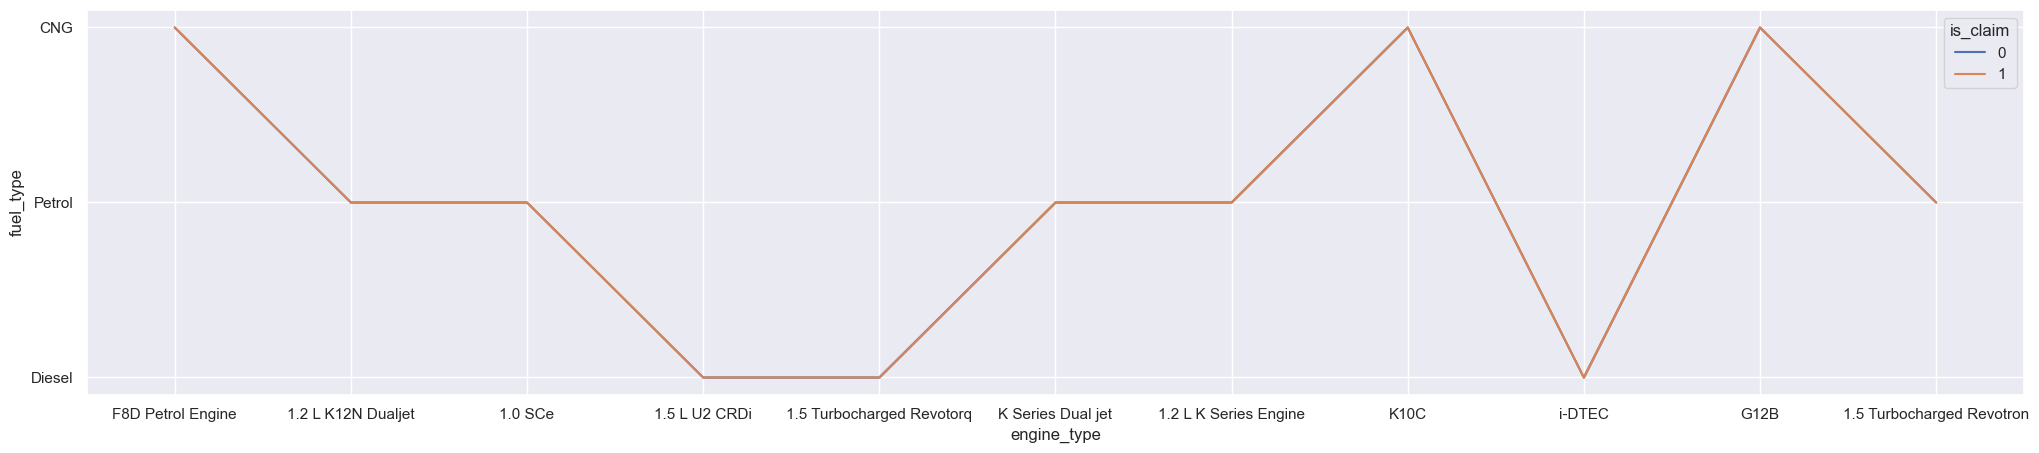

In [46]:
plt.figure(figsize=(25,5))
sns.lineplot(data=df,x="engine_type",y="fuel_type",hue="is_claim")
plt.show()

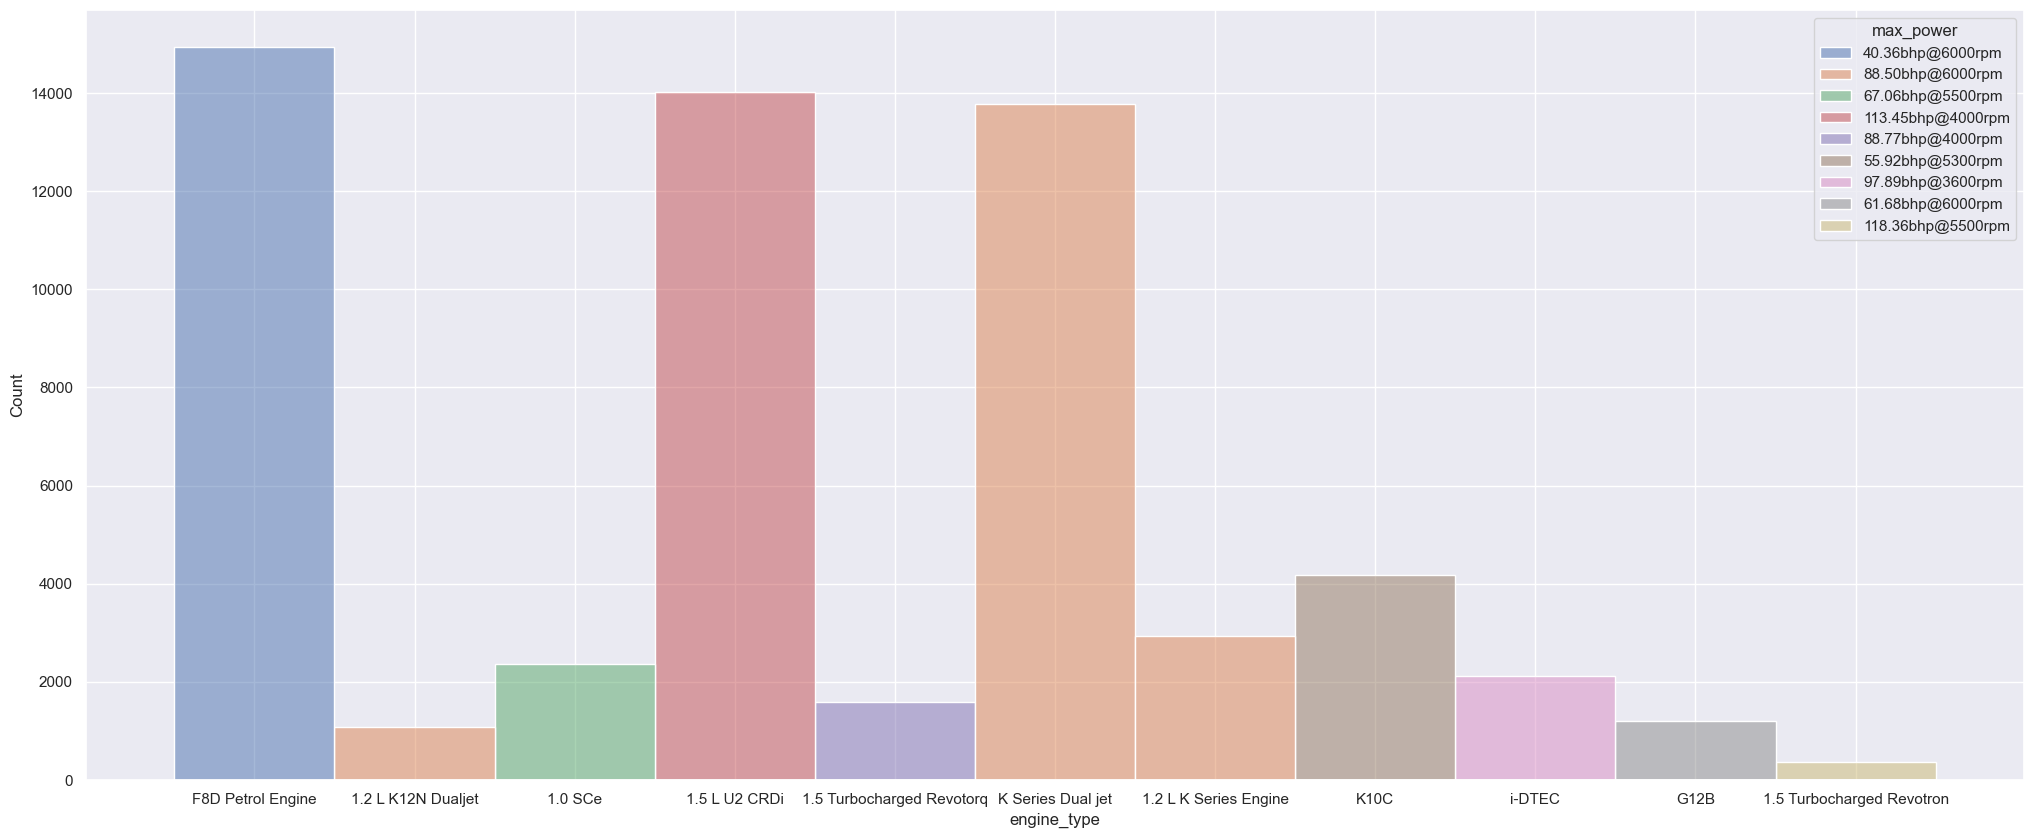

In [47]:
plt.figure(figsize=(25,10))
sns.histplot(data=df,x='engine_type',hue='max_power')
plt.show()

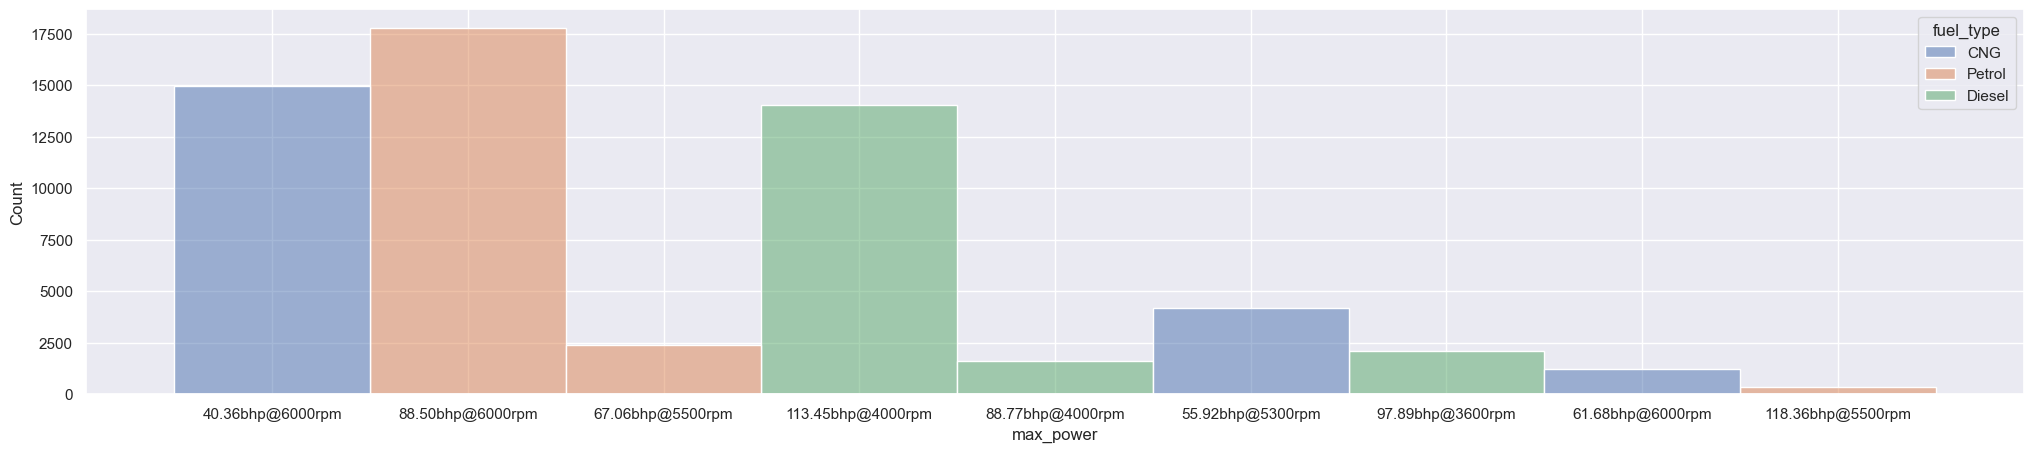

In [48]:
plt.figure(figsize=(25,5))
sns.histplot(data=df,x="max_power",hue="fuel_type")
plt.show()

<Axes: xlabel='steering_type', ylabel='Count'>

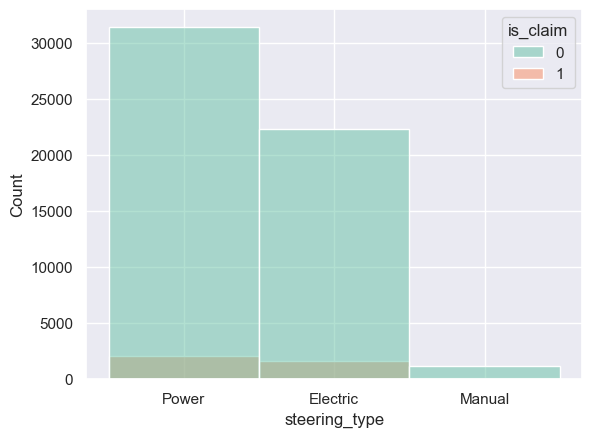

In [49]:
sns.histplot(data=df,x="steering_type",hue="is_claim",palette="Set2")

<Axes: xlabel='age_of_car', ylabel='age_of_policyholder'>

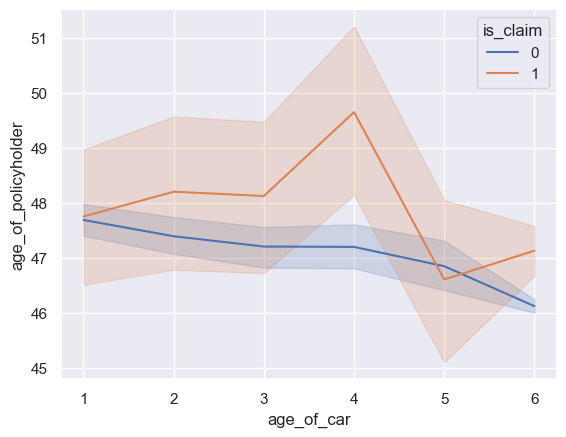

In [50]:
sns.lineplot(data=df, x="age_of_car",y='age_of_policyholder', hue="is_claim")

<Axes: >

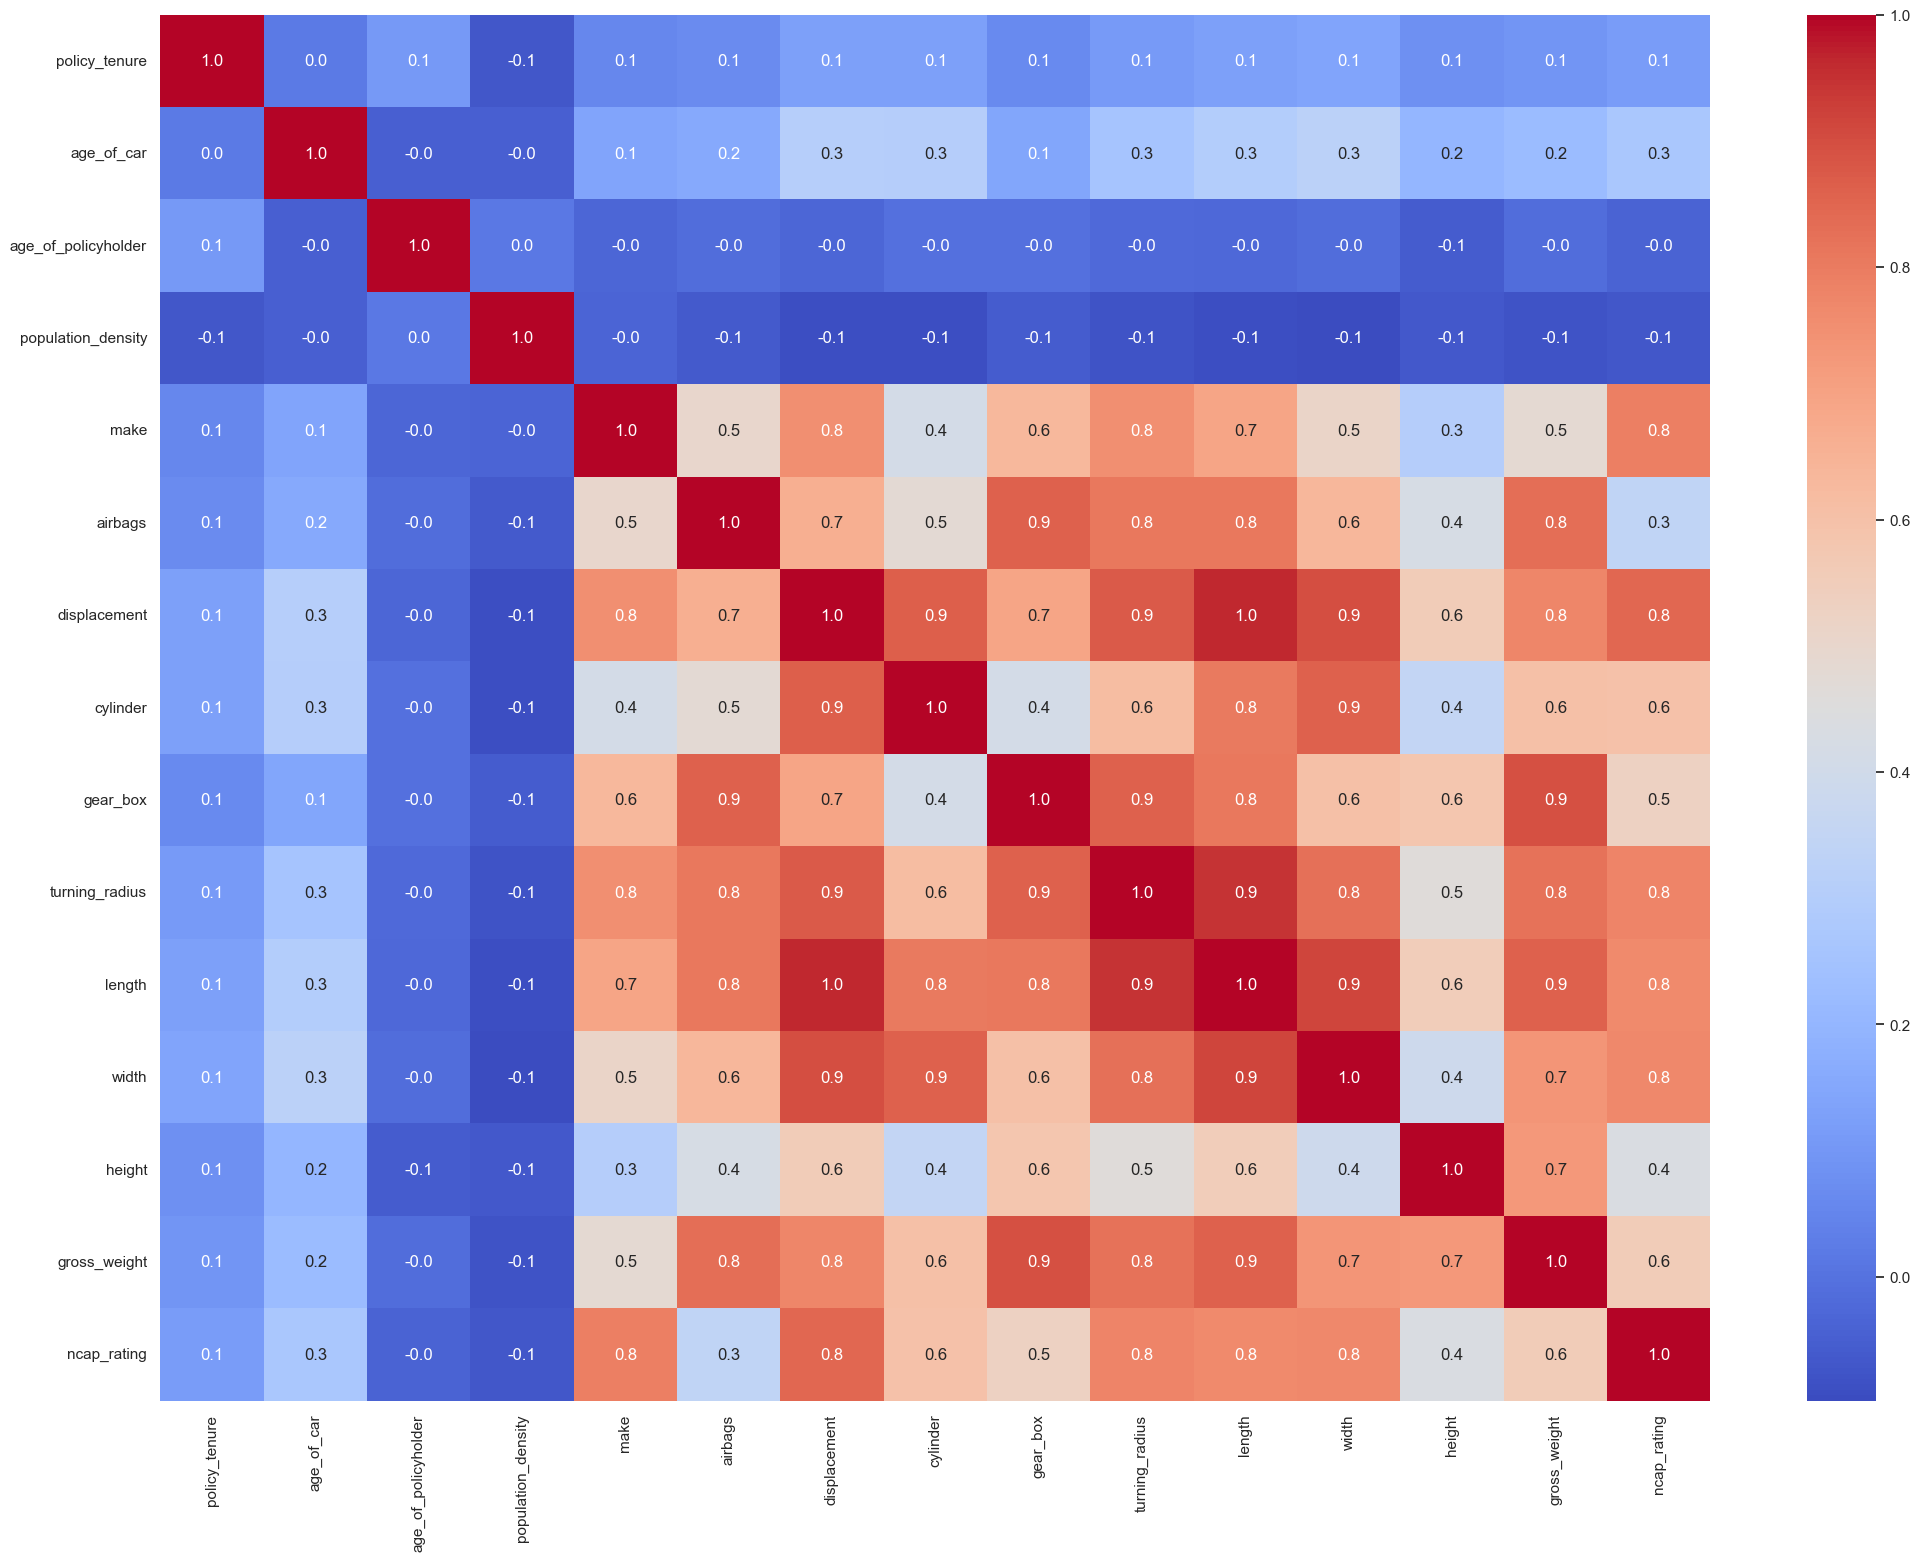

In [51]:
x=df
x=x.drop(['is_claim'],axis=1)

corr=x.corr()
plt.figure(figsize=(25,18))
sns.heatmap(corr, annot= True, cmap='coolwarm', fmt='.1f')

In [52]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr 

In [53]:
corr_features=correlation(x,0.75)
len(set(corr_features))

8

In [54]:
corr_features

{'cylinder',
 'displacement',
 'gear_box',
 'gross_weight',
 'length',
 'ncap_rating',
 'turning_radius',
 'width'}

In [55]:
x = x.drop(['gross_weight','length','width','policy_id',"turning_radius",'cylinder','displacement','gear_box'], axis=1)

In [56]:
x.dtypes

policy_tenure                        int32
age_of_car                           int32
age_of_policyholder                  int32
area_cluster                        object
population_density                   int64
make                                 int64
segment                             object
model                               object
fuel_type                           object
max_torque                          object
max_power                           object
engine_type                         object
airbags                              int64
is_esc                              object
is_adjustable_steering              object
is_tpms                             object
is_parking_sensors                  object
is_parking_camera                   object
rear_brakes_type                    object
transmission_type                   object
steering_type                       object
height                               int64
is_front_fog_lights                 object
is_rear_win

# DATA PREPROCESSING

In [57]:
from sklearn import preprocessing
area_cluster = preprocessing.LabelEncoder()
x['area_cluster'] = area_cluster.fit_transform(x['area_cluster'])
segment = preprocessing.LabelEncoder()
x['segment'] = segment.fit_transform(x['segment'])
model= preprocessing.LabelEncoder()
x['model'] = model.fit_transform(x['model'])
fuel_type= preprocessing.LabelEncoder()
x['fuel_type'] = fuel_type.fit_transform(x['fuel_type'])
max_torque= preprocessing.LabelEncoder()
x['max_torque'] = max_torque.fit_transform(x['max_torque'])
max_power= preprocessing.LabelEncoder()
x['max_power'] = max_power.fit_transform(x['max_power'])
engine_type= preprocessing.LabelEncoder()
x['engine_type'] = engine_type.fit_transform(x['engine_type'])


In [58]:
x = pd.get_dummies(x, columns=['is_esc'],drop_first=True)
x = pd.get_dummies(x, columns=['is_adjustable_steering'],drop_first=True)
x = pd.get_dummies(x, columns=['is_tpms'],drop_first=True)
x = pd.get_dummies(x, columns=['is_parking_sensors'],drop_first=True)
x = pd.get_dummies(x, columns=['is_parking_camera'],drop_first=True)
x = pd.get_dummies(x, columns=['rear_brakes_type'],drop_first=True)
x = pd.get_dummies(x, columns=['transmission_type'],drop_first=True)
x = pd.get_dummies(x, columns=['steering_type'],drop_first=True)
x = pd.get_dummies(x, columns=['is_front_fog_lights'],drop_first=True)
x = pd.get_dummies(x, columns=['is_rear_window_wiper'],drop_first=True)
x = pd.get_dummies(x, columns=['is_rear_window_washer'],drop_first=True)
x = pd.get_dummies(x, columns=['is_rear_window_defogger'],drop_first=True)
x = pd.get_dummies(x, columns=['is_brake_assist'],drop_first=True)
x = pd.get_dummies(x, columns=['is_central_locking'],drop_first=True)
x = pd.get_dummies(x, columns=['is_power_steering'],drop_first=True)
x = pd.get_dummies(x, columns=['is_driver_seat_height_adjustable'],drop_first=True)
x = pd.get_dummies(x, columns=['is_day_night_rear_view_mirror'],drop_first=True)
x = pd.get_dummies(x, columns=['is_ecw'],drop_first=True)
x = pd.get_dummies(x, columns=['is_speed_alert'],drop_first=True)
x = pd.get_dummies(x, columns=['is_power_door_locks'],drop_first=True)

In [59]:
pd.set_option('display.max_columns', None)
x.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,height,ncap_rating,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,is_power_door_locks_Yes
0,52,5,64,0,4990,1,0,0,0,5,2,6,2,1475,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,57,2,38,11,27003,1,0,0,0,5,2,6,2,1475,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,57,2,38,15,4076,1,0,0,0,5,2,6,2,1475,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,57,6,43,16,21622,1,3,3,2,0,6,2,2,1515,2,1,1,0,1,1,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1
4,57,6,63,17,34738,2,0,4,2,8,5,0,2,1490,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1


In [60]:
import imblearn

In [61]:
y=df
y=df['is_claim']

In [62]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_claim, dtype: int64

In [63]:
y.value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [64]:
from imblearn.over_sampling import RandomOverSampler
over=RandomOverSampler()
x_over,y_over=over.fit_resample(x,y)

In [65]:
print(x_over.shape, y_over.shape)
print(x.shape, y.shape)

(109688, 36) (109688,)
(58592, 36) (58592,)


In [66]:
y_over.value_counts()

0    54844
1    54844
Name: is_claim, dtype: int64

# Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x_over)

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_scaler,y_over, test_size=0.2, random_state=5)

### Model Building

In [69]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [70]:
list_met = []
list_accuracy = []

# DecisionTree
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

#XGBoost Classifer
xgb = XGBClassifier()
xgb = xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Combining all the above model with voting classifier
model_evc = VotingClassifier(estimators=[ ('dt',dt),('rf', rf),('knn', knn),('XGB', xgb)], voting='hard')
model_evc = model_evc.fit(x_train, y_train)
pred_evc = model_evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)


           Method Used  Accuracy
0         DecisionTree  0.887091
1         RandomForest  0.896344
2  K Nearest Neighbors  0.831297
3              XGBoost  0.748108
4               Voting  0.894430
Axes(0.125,0.11;0.775x0.77)


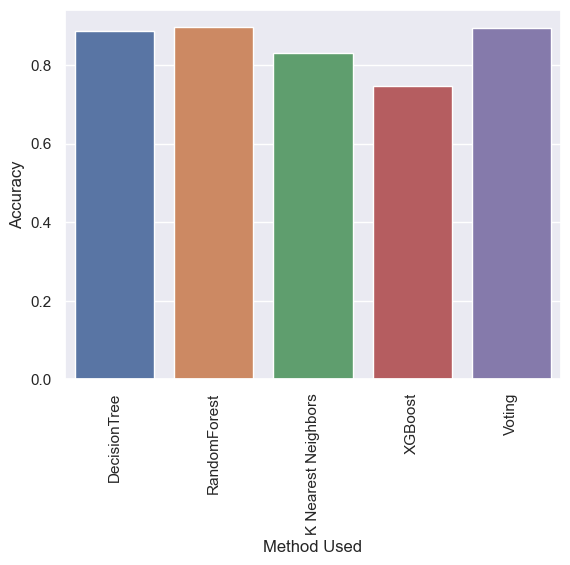

In [71]:
list1 = ['DecisionTree','RandomForest','K Nearest Neighbors','XGBoost','Voting']

list2 = [ accuracy_dt, accuracy_rf, accuracy_knn, accuracy_xgb, accuracy_evc]

list3 = [ dt, rf, knn,xgb, model_evc]

df_accuracy = pd.DataFrame({'Method Used': list1, "Accuracy": list2})

print(df_accuracy)

chart = sns.barplot(x = 'Method Used', y='Accuracy', data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

In [72]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')






cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)

Text(0.5, 427.9555555555555, 'Predicted label')

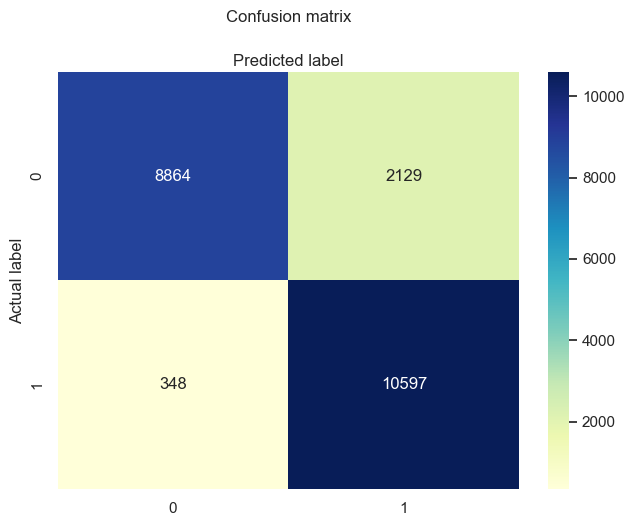

In [73]:
# name  of class
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [74]:
#performance Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt))
print("Recall:",metrics.recall_score(y_test, y_pred_dt))

Accuracy: 0.8870908925152703
Precision: 0.8327046990413327
Recall: 0.9682046596619461


In [75]:
from sklearn.metrics import roc_auc_score
rf_roc_auc = roc_auc_score(y_test, y_pred_dt)
rf_roc_auc

0.8872679806997078

In [76]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

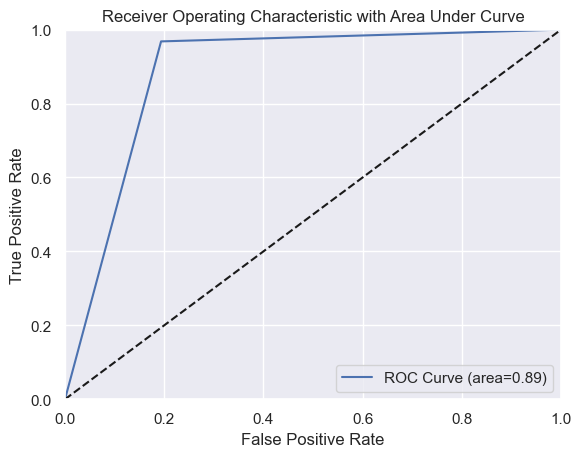

In [77]:
plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %rf_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

dt_classifier = DecisionTreeClassifier()
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 9],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

rs = RandomizedSearchCV(estimator=dt_classifier,param_distributions=param_dist,n_iter=10,cv=10)
rs.fit(x_train, y_train)

print("Best Hyperparameters: ", rs.best_params_)
print("Best Score: ", rs.best_score_)

# Evaluate the model on the test set
best_dt = rs.best_estimator_
y_pred_test = best_dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy: ", accuracy)


Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3}
Best Score:  0.8866324786324785
Test Set Accuracy:  0.8872732245418908


In [79]:
report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     10993
           1       0.83      0.97      0.90     10945

    accuracy                           0.89     21938
   macro avg       0.90      0.89      0.89     21938
weighted avg       0.90      0.89      0.89     21938



In [80]:
dt_classifier.set_params(criterion = 'entropy', 
              max_depth= None,
              max_features= "log2",
              min_samples_leaf= 1,
              min_samples_split=3)

DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=3)

In [81]:
dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=3)

# Predicition

In [82]:
test=pd.read_csv('insurance_test.csv')
test_set=test.copy()
test_set.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0


In [83]:
x_train.shape, test_set.shape

((87750, 36), (39063, 43))

In [84]:
test_set.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [85]:
test_set.dtypes

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

In [86]:
#converting the values 


test_set["age_of_car"]=round(test_set['age_of_car']*100)
test_set["age_of_policyholder"]=round(test_set['age_of_policyholder']*100)
test_set["policy_tenure"]=round(test_set['policy_tenure']*100)

In [87]:
test_set['age_of_car'] = test_set['age_of_car'].astype(int)
test_set['age_of_policyholder'] = test_set['age_of_policyholder'].astype(int)
test_set['policy_tenure'] = test_set['policy_tenure'].astype(int)

In [88]:
test_set['policy_tenure'].median()

57.0

In [89]:
test_set.loc[test_set['policy_tenure'] >= 57, 'policy_tenure'] = 57

In [90]:
test_set['policy_tenure'].value_counts()

57    19786
9      1440
8      1106
10      872
1       580
4       500
5       499
7       471
3       450
6       359
29      355
24      349
14      344
26      343
25      338
30      337
2       322
13      320
53      318
56      314
55      313
28      312
27      310
51      310
22      306
15      302
12      301
54      300
21      287
11      286
52      286
17      284
23      281
20      278
50      276
34      272
19      272
31      260
33      248
18      247
16      246
47      245
32      239
49      238
36      235
38      231
48      228
45      225
46      225
41      221
35      214
37      210
39      205
40      201
43      199
44      198
42      196
0       173
Name: policy_tenure, dtype: int64

In [91]:
test_set.loc[test_set['policy_tenure'] == 0.0, 'policy_tenure']=57

In [92]:
pd.set_option('display.max_rows',None)
test_set['age_of_car'].value_counts()

1      4086
0      3486
2      3472
3      3013
4      2511
5      2267
10     2135
6      2123
7      1840
8      1807
9      1769
12     1705
11     1623
13     1564
14     1390
15     1275
16      892
17      629
18      446
19      333
20      203
21      139
22       71
23       52
24       44
25       32
26       29
29       20
27       19
28       17
31       12
35       10
37        6
32        6
36        6
33        6
30        5
34        4
44        3
100       2
43        1
99        1
48        1
50        1
38        1
42        1
41        1
46        1
51        1
54        1
76        1
Name: age_of_car, dtype: int64

In [93]:
test_set['age_of_car'].median()

6.0

In [94]:
test_set.loc[test_set['age_of_car'] >= 20, 'age_of_car'] = 20

In [95]:
test_set['age_of_car'].median()

6.0

In [96]:
test_set.loc[test_set['age_of_car'] == 0.0, 'age_of_car'] = 6

In [97]:
pd.set_option('display.max_rows',None)
test_set['age_of_policyholder'].value_counts()

38    2248
40    1217
41    1182
39    1157
36    1151
46    1145
44    1138
35    1132
37    1131
47    1126
42    1119
43    1111
48    1107
34    1092
32    1091
33    1089
49    1072
45    1069
31    1042
51    1035
30    1028
50     989
52     955
53     920
29     908
54     881
62     861
55     780
56     725
57     720
58     669
59     570
60     525
61     505
65     427
63     398
64     397
66     353
67     316
68     311
69     281
70     277
72     234
71     229
73     221
74     193
75     169
76     143
78     100
77      95
79      91
80      78
81      59
82      41
83      37
85      21
86      21
84      19
88      19
87      16
90      10
89       4
91       4
93       3
96       2
94       1
92       1
97       1
99       1
Name: age_of_policyholder, dtype: int64

In [98]:
test_set['age_of_policyholder'].median()

45.0

In [99]:
test_set.loc[test_set['age_of_policyholder'] >= 80, 'age_of_policyholder'] = 45

In [100]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr 

In [101]:
corr_features=correlation(test_set,0.71)
len(set(corr_features))

8

In [102]:
corr_features

{'cylinder',
 'displacement',
 'gear_box',
 'gross_weight',
 'length',
 'ncap_rating',
 'turning_radius',
 'width'}

In [103]:
test_set = test_set.drop(['gross_weight','length','displacement','turning_radius','width','cylinder','policy_id',"gear_box"], axis=1)

In [104]:
from sklearn import preprocessing
area_cluster = preprocessing.LabelEncoder()
test_set['area_cluster'] = area_cluster.fit_transform(test_set['area_cluster'])
segment = preprocessing.LabelEncoder()
test_set['segment'] = segment.fit_transform(test_set['segment'])
model= preprocessing.LabelEncoder()
test_set['model'] = model.fit_transform(test_set['model'])
fuel_type= preprocessing.LabelEncoder()
test_set['fuel_type'] = fuel_type.fit_transform(test_set['fuel_type'])
max_torque= preprocessing.LabelEncoder()
test_set['max_torque'] = max_torque.fit_transform(test_set['max_torque'])
max_power= preprocessing.LabelEncoder()
test_set['max_power'] = max_power.fit_transform(test_set['max_power'])
engine_type= preprocessing.LabelEncoder()
test_set['engine_type'] = engine_type.fit_transform(test_set['engine_type'])


In [105]:
test_set = pd.get_dummies(test_set, columns=['is_esc'],drop_first=True)
test_set = pd.get_dummies(test_set, columns=['is_adjustable_steering'],drop_first=True)
test_set = pd.get_dummies(test_set, columns=['is_tpms'],drop_first=True)
test_set = pd.get_dummies(test_set, columns=['is_parking_sensors'],drop_first=True)
test_set = pd.get_dummies(test_set, columns=['is_parking_camera'],drop_first=True)
test_set = pd.get_dummies(test_set, columns=['rear_brakes_type'],drop_first=True)
test_set = pd.get_dummies(test_set, columns=['transmission_type'],drop_first=True)
test_set = pd.get_dummies(test_set, columns=['steering_type'],drop_first=True)
test_set = pd.get_dummies(test_set, columns=['is_front_fog_lights'],drop_first=True)
test_set = pd.get_dummies(test_set, columns=['is_rear_window_wiper'],drop_first=True)
test_set = pd.get_dummies(test_set, columns=['is_rear_window_washer'],drop_first=True)
test_set = pd.get_dummies(test_set, columns=['is_rear_window_defogger'],drop_first=True)
test_set = pd.get_dummies(test_set, columns=['is_brake_assist'],drop_first=True)
test_set = pd.get_dummies(test_set, columns=['is_central_locking'],drop_first=True)
test_set = pd.get_dummies(test_set, columns=['is_power_steering'],drop_first=True)
test_set = pd.get_dummies(test_set, columns=['is_driver_seat_height_adjustable'],drop_first=True)
test_set = pd.get_dummies(test_set, columns=['is_day_night_rear_view_mirror'],drop_first=True)
test_set = pd.get_dummies(test_set, columns=['is_ecw'],drop_first=True)
test_set = pd.get_dummies(test_set, columns=['is_speed_alert'],drop_first=True)
test_set = pd.get_dummies(test_set, columns=['is_power_door_locks'],drop_first=True)

In [106]:
test_set.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,height,ncap_rating,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,is_power_door_locks_Yes
0,34,6,59,15,4076,1,0,0,0,5,2,6,2,1475,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,31,13,44,20,8794,1,2,7,2,0,6,8,2,1530,2,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1
2,33,12,45,20,8794,2,0,4,2,8,5,0,2,1490,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1
3,57,1,46,17,34738,1,0,0,0,5,2,6,2,1475,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,57,2,63,17,34738,1,0,0,0,5,2,6,2,1475,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0


In [107]:
test_set.dtypes

policy_tenure                           int32
age_of_car                              int32
age_of_policyholder                     int32
area_cluster                            int32
population_density                      int64
make                                    int64
segment                                 int32
model                                   int32
fuel_type                               int32
max_torque                              int32
max_power                               int32
engine_type                             int32
airbags                                 int64
height                                  int64
ncap_rating                             int64
is_esc_Yes                              uint8
is_adjustable_steering_Yes              uint8
is_tpms_Yes                             uint8
is_parking_sensors_Yes                  uint8
is_parking_camera_Yes                   uint8
rear_brakes_type_Drum                   uint8
transmission_type_Manual          

In [108]:
pred = dt_classifier.predict(test_set)

In [109]:
test_set['Prediction']=pred
test_set.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,height,ncap_rating,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,is_power_door_locks_Yes,Prediction
0,34,6,59,15,4076,1,0,0,0,5,2,6,2,1475,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1,31,13,44,20,8794,1,2,7,2,0,6,8,2,1530,2,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0
2,33,12,45,20,8794,2,0,4,2,8,5,0,2,1490,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0
3,57,1,46,17,34738,1,0,0,0,5,2,6,2,1475,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,57,2,63,17,34738,1,0,0,0,5,2,6,2,1475,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0


In [110]:
test_set['Prediction'].value_counts()

0    29851
1     9212
Name: Prediction, dtype: int64